In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
import scipy.stats as sps
%pylab inline


Populating the interactive namespace from numpy and matplotlib


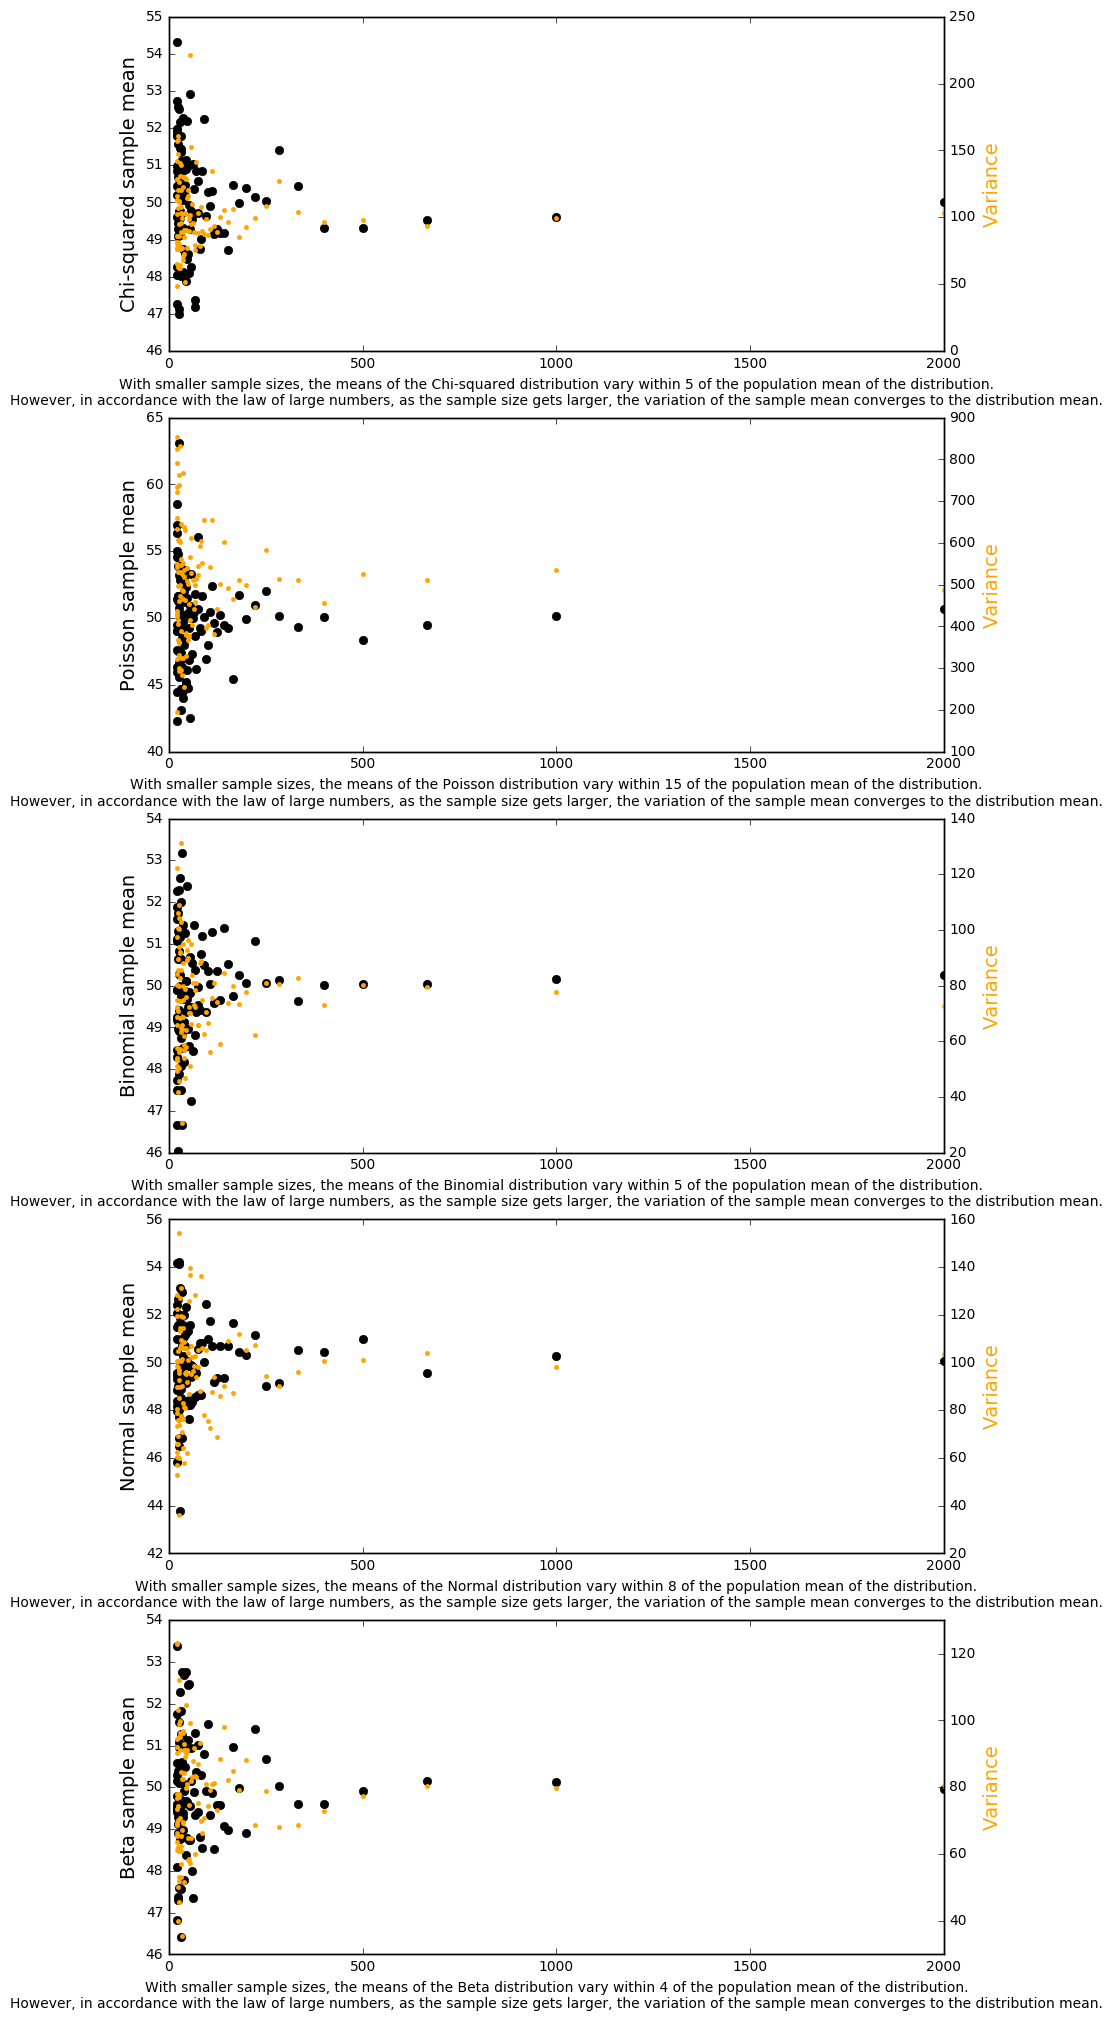

In [2]:
np.random.seed(10071973)
# Next line from the professor
mysize = (2000 / (np.array(range(1, 101)))).astype(int)

# The distributions are stored in a dictionary with one key for each distribution
# Inside each element is a dictionary with the following elements
#    desc: A description of the distribution associated with the key, to be put in any text
#          associated with it
#    data: a list of ndarray's of varying sizes with random numbers by the distribution
#    means: a list of means
#    var: a list of variances
#    vars: a list of sample variances
#    skew: a list of skews
#    kurt: a list of kurtosises
dists = {"chisq" : {"desc" : "Chi-squared"}, "pois" : {"desc" : "Poisson"},
         "binom" : {"desc" : "Binomial"}, "norm" : {"desc" : "Normal"}, "beta" : {"desc" : "Beta"}}
dlist = dists.keys()
figno = 511
fig = pl.figure(figsize=(10, 25))
ax = {"var" : {}, "skew" : {}, "kurt" : {}}
for distyp in "chisq", "pois", "binom", "norm", "beta":
    # Set up a subplot for each of the distributions
    # The mean will be presented on the left y-axis and variance on the right
    ax[distyp] = fig.add_subplot(figno)
    ax["var"][distyp] = ax[distyp].twinx()
    #print(type(ax["var"][distyp]))
    ax["var"][distyp].set_ylabel("Variance", color="Orange", fontsize=14)
    figno += 1
    ax[distyp].set_ylabel(dists[distyp]["desc"] + " sample mean", fontsize=14)
    dists[distyp]["data"] = []
    dists[distyp]["means"] = []
    dists[distyp]["sum2"] = []
    dists[distyp]["var"] = []
    dists[distyp]["vars"] = []
    dists[distyp]["sum3"] = []
    dists[distyp]["skew"] = []
    dists[distyp]["sum4"] = []
    dists[distyp]["kurt"] = []
#ax["beta"].set_xlabel("sample size", fontsize=14)
for i in range(100):
    # Add a sample to each distribution
    dists["chisq"]["data"].append(np.random.chisquare(50, mysize[i]))
    dists["pois"]["data"].append(np.random.poisson(5, mysize[i]) * 10)
    dists["binom"]["data"].append(np.random.binomial(50, .4, mysize[i]) * 2.5)
    dists["norm"]["data"].append(np.random.randn(mysize[i]) * 10 + 50)
    dists["beta"]["data"].append(np.random.beta(10, 5, mysize[i]) * 75)
    for distyp in "chisq", "pois", "binom", "norm", "beta":
        # Calculate statistics for each distribution for the currenct size
        base = dists[distyp]["data"][i]
        sq = base * base
        cub = sq * base
        quar = cub * base
        dists[distyp]["means"].append(dists[distyp]["data"][i].mean())
        dists[distyp]["var"].append(sq.mean() - base.mean() ** 2)
        dists[distyp]["vars"].append(dists[distyp]["var"][i] * mysize[i] / (mysize[i] - 1))
        #dists[distyp]["skew"].append((cub.mean() - 3 * base.mean() * sq.mean() - base.mean()**3) / dists[distyp]["var"][i] ** 1.5)
        dists[distyp]["skew"].append(sps.skew(dists[distyp]["data"][i]))
        dists[distyp]["kurt"].append((quar.mean() - 4 * cub.mean() * base.mean() + 6 * sq.mean() * base.mean()**2 - 3 * base.mean()**4) /
                                    dists[distyp]["var"][i]**2)
        # Plot mean in black and variance in orange
        ax[distyp].plot(mysize[i], dists[distyp]["means"][i], "ko")
        ax["var"][distyp].plot(mysize[i], dists[distyp]["vars"][i], ".", color="orange")
erange = {"chisq" : 5, "pois" : 15, "binom" : 5, "norm" : 8, "beta" : 4}
for distyp in dists.keys():
    annotext = "With smaller sample sizes, the means of the "
    annotext += dists[distyp]["desc"] + " distribution vary within "
    annotext += str(erange[distyp]) + " of the population mean of the distribution.\nHowever, in accordance with "
    annotext += "the law of large numbers, as the sample size gets larger, the variation of the "
    annotext += "sample mean converges to the distribution mean."
    #ax[distyp].annotate(annotext, xy=(750, 45), xytext=(750, 45))
    ax["var"][distyp].tick_params("x", color="orange")
    ax[distyp].set_xlabel(annotext, fontsize=10)

With smaller sample sizes, the means from each of the distributions vary within 5 to 15 of the population mean of the distribution. However, in accordance with the law of large numbers, as the sample size gets larger, the variation of the sample mean converges to the distribution mean.

In [3]:
import math
def find_mus(arrin):
    sums = [0, 0, 0, 0]
    for p in (range(4)):
        for i in (range(len(arrin))):
            sums[p] += arrin[i] ** (p + 1)
        sums[p] /= len(arrin)
    return(sums)

def find_moments(arrin):
    moms = [0, 0, 0, 0]
    mus = find_mus(arrin)
    moms[0] = mus[0]
    moms[1] = mus[1] - mus[0]**2
    moms[2] = (mus[2] - 3*mus[0]*moms[1] - mus[0]**3) / moms[1]**1.5
    moms[3] = (mus[3] - 4*mus[2]*mus[0] + 6*mus[1]*mus[0]**2 - 3*mus[0]**4) / moms[1]**2
    return(moms)

for i in 2, 4, 6, 8, 10:
    dmoments = find_moments(dists["norm"]["data"][i])
    print("%-20s%f\n%-20s%f\n%-20s%f\n%-20s%f\n"%
          ("Mean:", dmoments[0], "Variance:", dmoments[1],
           "Skewness:", dmoments[2], "Excess kurtosis:", dmoments[3]-3))

Mean:               49.554029
Variance:           104.052906
Skewness:           0.071597
Excess kurtosis:    -0.019821

Mean:               50.446443
Variance:           100.546324
Skewness:           0.060596
Excess kurtosis:    -0.259176

Mean:               49.156135
Variance:           89.888856
Skewness:           0.020394
Excess kurtosis:    -0.218761

Mean:               51.167516
Variance:           106.777895
Skewness:           0.264913
Excess kurtosis:    0.036257

Mean:               50.437491
Variance:           111.408338
Skewness:           -0.007227
Excess kurtosis:    -0.273946



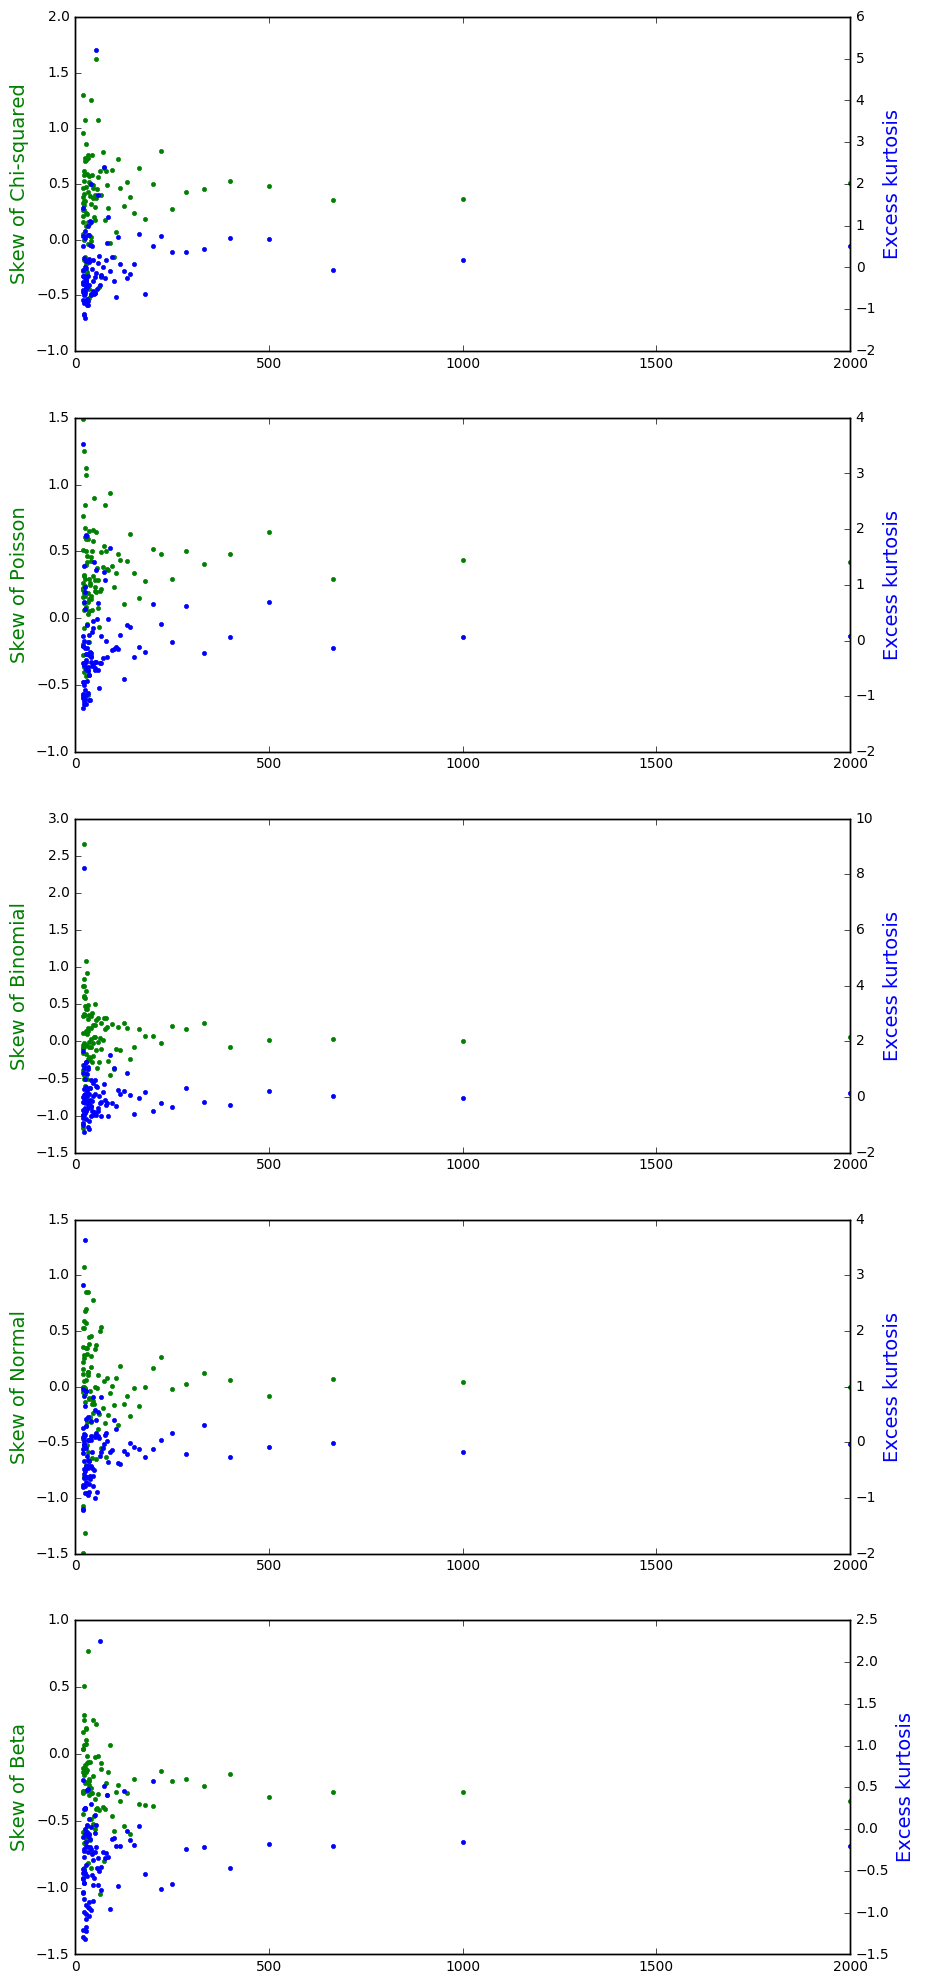

In [4]:
fig2 = pl.figure(figsize=(10, 25))
figno = 511
# Repeat the previous set of figures for skew and kurtosis for each distribution
for distyp in "chisq", "pois", "binom", "norm", "beta":
    ax["skew"][distyp] = fig2.add_subplot(figno)
    ax["skew"][distyp].set_ylabel("Skew of " + dists[distyp]["desc"], color="green", fontsize=14)
    ax["kurt"][distyp] = ax["skew"][distyp].twinx()
    ax["kurt"][distyp].set_ylabel("Excess kurtosis", color="blue", fontsize=14)
    for i in range(0, 100):
        ax["skew"][distyp].plot(mysize[i], dists[distyp]["skew"][i], "g.")
        ax["kurt"][distyp].plot(mysize[i], dists[distyp]["kurt"][i]-3, "b.")
    figno += 1

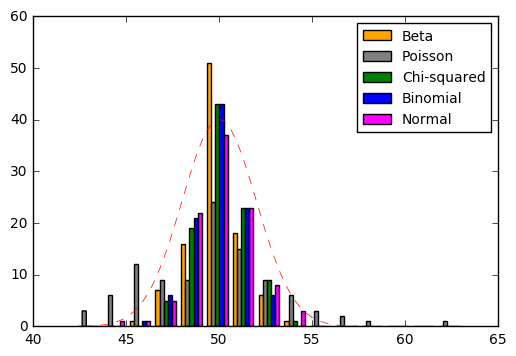

In [5]:
# Multi-histogram comes from gallery on matplotlib.org
# http://matplotlib.org/examples/statistics/histogram_demo_multihist.html
distpanel = np.vstack(dists[dtyp]["means"] for dtyp in dlist).T
descs = [dists[dtyp]["desc"] for dtyp in dlist]
colors = ['orange', 'grey', 'green', 'blue', 'magenta']
histfig, histax = plt.subplots(nrows=1, ncols=1)
histax.hist(distpanel, 15, histtype='bar', color=colors, label=descs)
histax.legend(prop={"size" : 10})
gcurvex = []
x = 40
while x < 65:
    gcurvex.append(x)
    x += .1
gcurvey = [exp(-((50-gcurvex[i])/2)**2/2) * 40 for i in range(0, len(gcurvex))]
histax.plot(gcurvex, gcurvey, "r--", lw=.5)